In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
url = "penguins.csv"

df = pd.read_csv(url)
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
features = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
x = df[features].dropna()
y = df.loc[x.index,['sex']]

In [4]:
x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [5]:
y

,sex
0,MALE
1,FEMALE
2,FEMALE
4,FEMALE
5,MALE
...,...
338,FEMALE
340,FEMALE
341,MALE
342,FEMALE


In [6]:
x = StandardScaler().fit_transform(x)

In [7]:
x

array([[-0.88449874,  0.78544923, -0.126893  , -0.56414208],
       [-0.81112573,  0.1261879 , -0.1076753 , -0.50170305],
       [-0.66437972,  0.43046236, -0.07308344, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  0.03069212,  1.93341896],
       [ 0.23443963, -1.19233476, -0.00774327,  1.24658968],
       [ 1.09657248, -0.53307343, -0.00389973,  1.49634578]])

In [8]:
pca = PCA(n_components=2)
principialComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principialComponents, columns=['principial component 1','principial component 2'])

In [9]:
principalDf

,principial component 1,principial component 2
0,-1.267612,-0.061515
1,-0.856075,-0.168569
2,-1.370469,-0.091827
3,-1.913687,-0.007607
4,-1.807132,0.166324
...,...,...
337,1.804024,-0.267099
338,1.549584,-0.211491
339,2.306314,0.064988
340,1.540073,-0.175226


In [10]:
final_dataframe = pd.concat([principalDf, df[['sex']]],axis=1)

In [11]:
final_dataframe.head()

,principial component 1,principial component 2,sex
0,-1.267612,-0.061515,MALE
1,-0.856075,-0.168569,FEMALE
2,-1.370469,-0.091827,FEMALE
3,-1.913687,-0.007607,NaN
4,-1.807132,0.166324,FEMALE


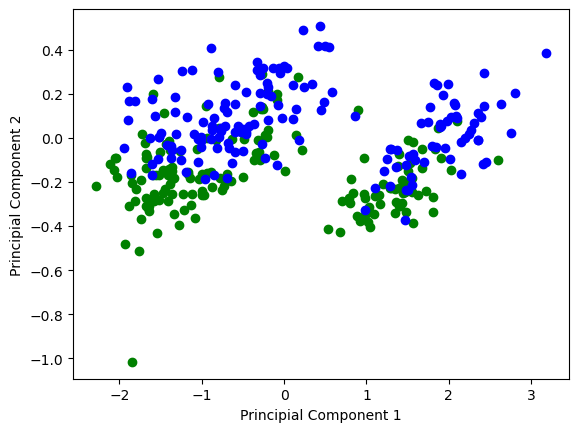

In [12]:
import matplotlib.pyplot as plt
dfMale = final_dataframe[df.sex == 'MALE']
dfFemale = final_dataframe[df.sex == 'FEMALE']
plt.xlabel('Principial Component 1')
plt.ylabel('Principial Component 2')

plt.scatter(dfMale['principial component 1'], dfMale['principial component 2'], color='green')
plt.scatter(dfFemale['principial component 1'], dfFemale['principial component 2'], color='blue')

In [13]:
pca.explained_variance_ratio_

array([0.47114808, 0.25339237])

In [14]:
pca.explained_variance_ratio_.sum()

0.7245404483670994